# Building a machine learning program

In this section we put together everything we learned about images and features so that we can train a machine learning algorithm to distinguish between the images of different tags.

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

## Loading the Dataset

We'll start by loading the entire dataset of images viewing a few of them to double check that everything worked:

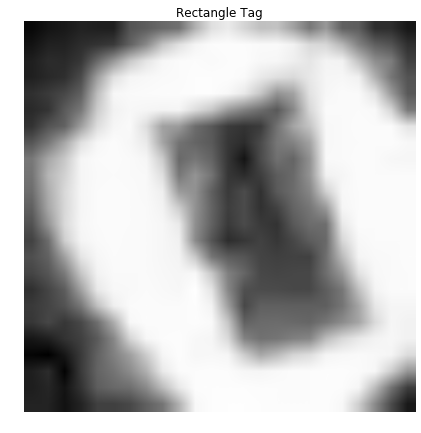

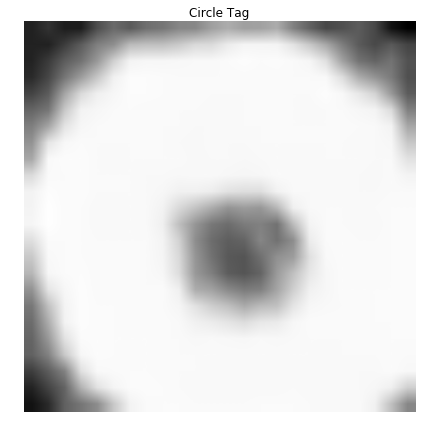

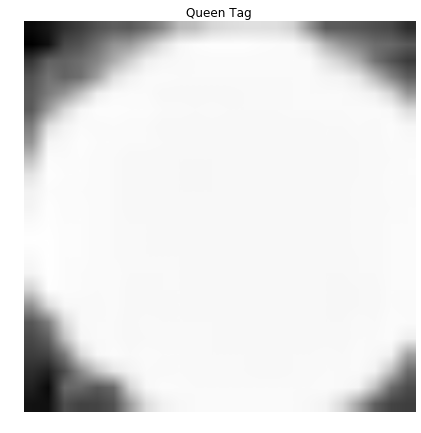

In [2]:
import glob

rect_tag_files = glob.glob('data/I/*.png')
circle_tag_files = glob.glob('data/O/*.png')
queen_tag_files = glob.glob('data/Q/*.png')

rect_image =    cv2.imread(rect_tag_files[0], cv2.IMREAD_GRAYSCALE)
circle_image =  cv2.imread(circle_tag_files[0], cv2.IMREAD_GRAYSCALE)
queen_image =   cv2.imread(queen_tag_files[0], cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (10, 7))
plt.title('Rectangle Tag')
plt.axis('off')
plt.imshow(rect_image,  cmap = cm.Greys_r)

plt.figure(figsize = (10, 7))
plt.title('Circle Tag')
plt.axis('off')
plt.imshow(circle_image,  cmap = cm.Greys_r)

plt.figure(figsize = (10, 7))
plt.title('Queen Tag')
plt.axis('off')
plt.imshow(queen_image,  cmap = cm.Greys_r)

## Classes and Reading Images
If you recall from earlier, the three different tag types indicated a different group in the experiment.

Tag Number             |  Pattern   | Details
:-------------------------:|:-------------------------: | :-------------------------:
1  |  Rectangle | 100 bees that were the control group
2  |  Circle    | 100 bees that were treated with caffeine
3  | Blank      | Single queen in the colony received this tag

Just like in statistics, machine learning algorithms require that we refer to each image as a number, like levels in a factor. In the case of machine learning however, these levels are called classes. We'll now create a list that will assign each image a number which corresponds to the class it belongs to:

In [3]:
rect_tag_class = len(rect_tag_files) * [1]
circle_tag_class = len(circle_tag_files) * [2]
queen_tag_class = len(queen_tag_files) * [3]

print(len(rect_tag_files), len(rect_tag_class), rect_tag_files[0], rect_tag_class[0])
print(len(circle_tag_files), len(circle_tag_class), circle_tag_files[0], circle_tag_class[0])
print(len(queen_tag_files), len(queen_tag_class), queen_tag_files[0], queen_tag_class[0])

310 310 data/I/108282.png 1
312 312 data/O/100752.png 2
108 108 data/Q/104823.png 3


## Reading Images

We now need to read in the image files we have listed and merge the classifications into one list.

In [4]:
all_tag_files = []
all_tag_files.extend(rect_tag_files)
all_tag_files.extend(circle_tag_files)
all_tag_files.extend(queen_tag_files)

all_classifications = []
all_classifications.extend(rect_tag_class)
all_classifications.extend(circle_tag_class)
all_classifications.extend(queen_tag_class)

all_images = []
for image_file in all_tag_files:
    read_image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
    all_images.append(read_image)

print("Do the number of images and the number of classifications in the two lists match up?")
print(len(all_images), len(all_classifications))

Do the number of images and the number of classifications in the two lists match up?
730 730


## Feature Engineering
Now we have our images, let's use some of the skills we learned earlier to apply some manipulations to the images. We can play with this a lot, and it's often the section you'll come back to once you test out the classification system you train to see if you can improve performance.

## Feature Tests
Here we'll visualise the manipulations of a few different images before we apply it to all of them. The easiest way to do this is to create a function. Here we can apply things like modifying the brightness, smoothing and blurring the images.

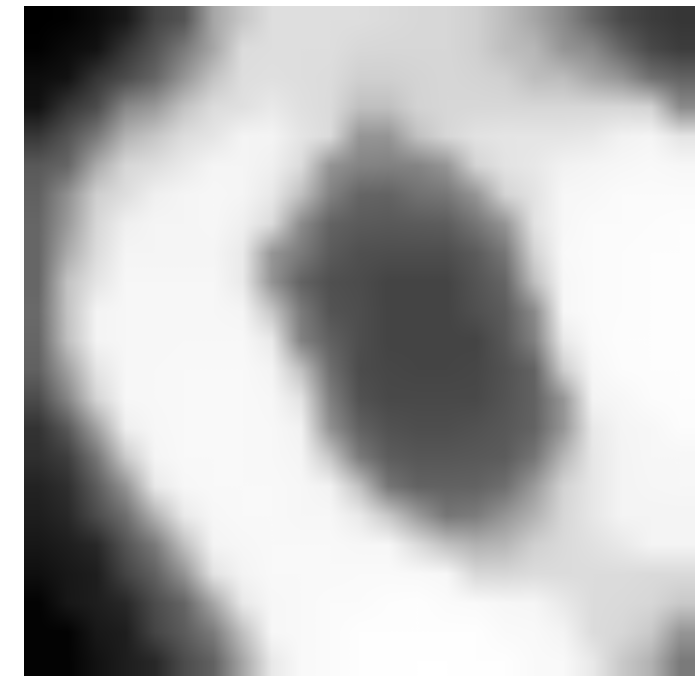

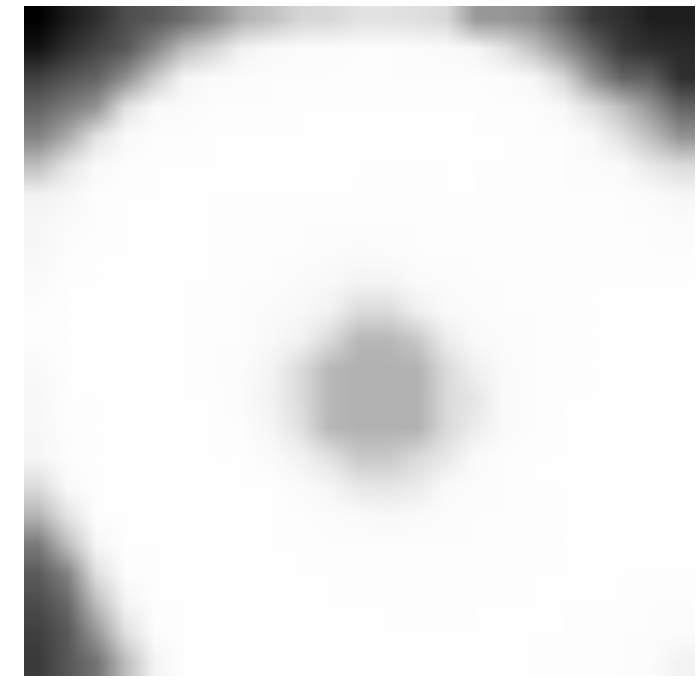

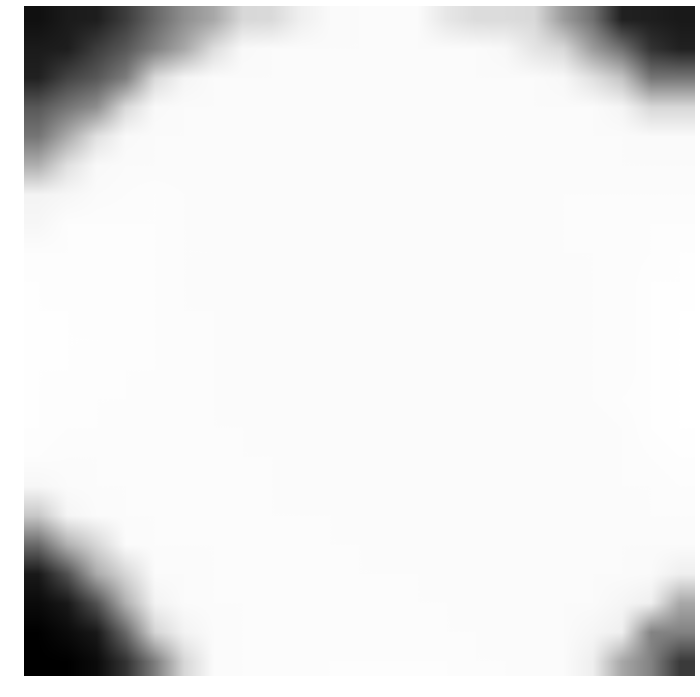

In [29]:
test_images = [rect_image, circle_image, queen_image]

def modify_image(img):
    #img = cv2.blur(image, (5, 5))
    #img = cv2.GaussianBlur(image, (5, 5), 0)
    img = cv2.medianBlur(image, 9)
    #img += 10
    img * 0.6
    
    img = img[1:24,1:24]
    return img

for image in test_images:
    image = modify_image(image)
    plt.figure(figsize = (15, 12))
    plt.axis('off')
    plt.imshow(image, cmap = cm.Greys_r)

## Modifying and Flattening All Images
Once we've settled on a technique we think might work, we can apply it to all the images in our dataset. We can then flatten the images and convert them to NumPy arrays. The reason why we need to flatten them is because we need to be able to pass a matrix of values to the machine learning algorithm we train.

Once we have done that, we'll want to convert the flattened images and our list of classifications into a NumPy array so that it is in a format that scikitlearn can understand.

In [30]:
all_images_flat = []
for image in all_images:
    mod_image = modify_image(image)
    flat_image = mod_image.flatten()
    all_images_flat.append(flat_image)

X = np.array(all_images_flat)
y = np.array(all_classifications)

print(X.shape, y.shape)

(730, 529) (730,)


## Splitting a training and testing dataset

Ok, now that our data is ready, we have one more thing to consider before we can train our machine learning program: testing. How do I know that my program will be more accurate if I change the brightness and contrast? How do I that after all this work, my program is doing no better than random chance at determining which tag is in an image?

The solution to this is to split up our data into two segments: a training set and a testing set. The training set is what we will allow our machine learning program to learn from, while the testing set allows us to then see how accurate the program is with data that it has not been exposed to.

In [31]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(584, 529) (584,) (146, 529) (146,)


We now have 584 images that we will train our program on and 146 images to test the accuracy of its predictions. Each of the pixels that each image has is now a feature or dimension that we can train our machine learning program on.

# Visualising the Data

Now that we have hundreds of images, each with hundreds of dimensions, we need to try to find a way to visualise all this data. To acheive this, we'll try to use a dimensionality reduction technique called PCA. PCA is an unsupervised technique which tries to collapse the number of dimensions in your data down by looking for variables with the highest variation. Here, we'll try to collapse the data down to just 2 dimensions:

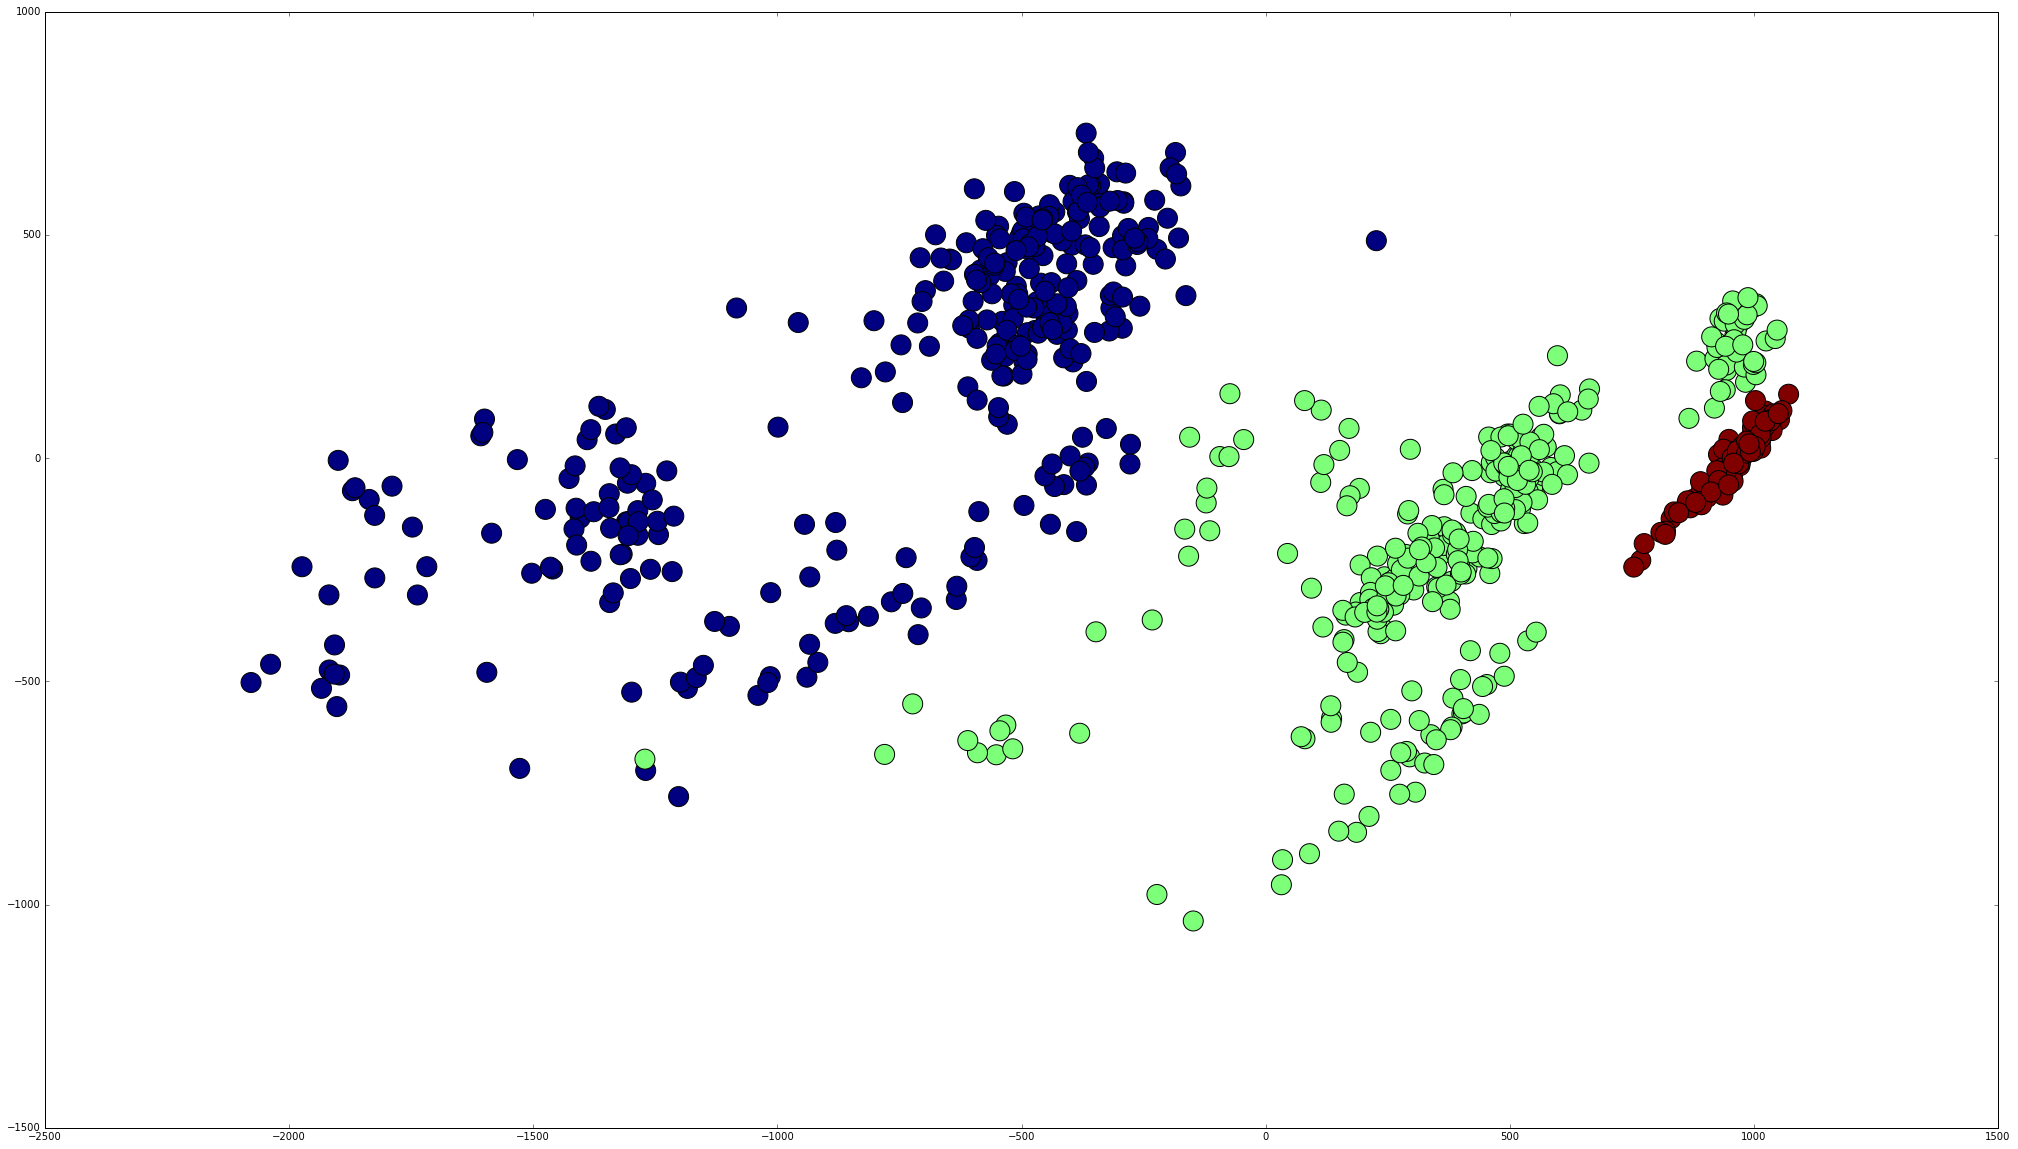

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
fit_trans_X = pca.fit(X).transform(X)
plt.figure(figsize = (35, 20))
plt.scatter(fit_trans_X[:, 0], fit_trans_X[:, 1], c=y, s=400)

This looks promising, it looks like PCA was able to separate out the clusters which correpsond to the different image types in our data. Things are looking good, but I think we can do better with a supervised dimensionality techinuqe called LDA. LDA is very similar to PCA, except we tell it what groups we want to separate out with our data and it looks for the variation which will help us achieve this.

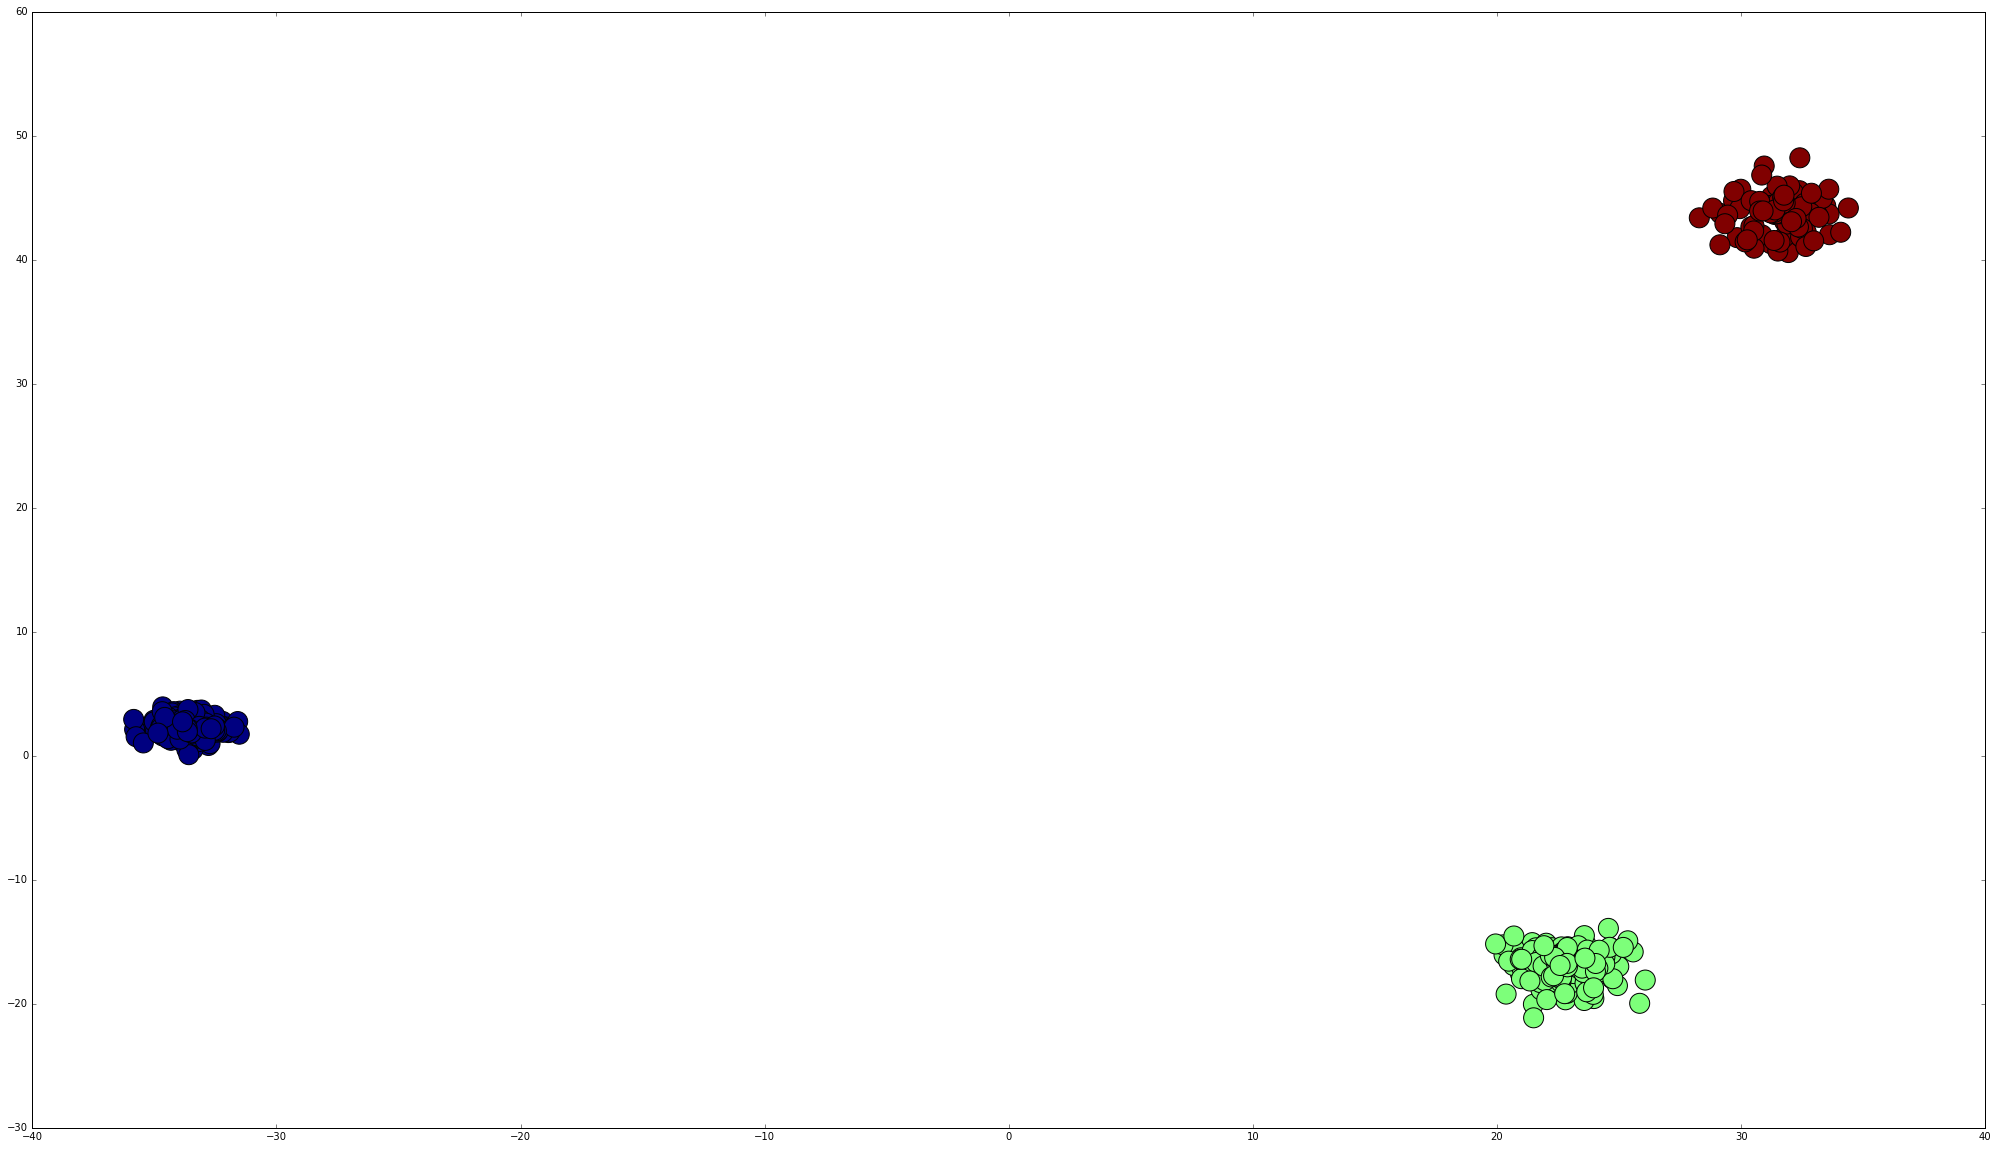

In [33]:
from sklearn.lda import LDA

lda = LDA(n_components=2)
lda_model = lda.fit(X_train, y_train)
X_trans = lda_model.transform(X_train)
plt.figure(figsize = (35, 20))
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y_train, s=400)

That's looking really good now, we have 3 neat clusters for each of the tag types. Now we can can try to use the data output by LDA to train a machine learning algorithm called a support vector machine (SVM).

## SVM Classification

A support vector machine is a machine learning techinque which tries to separate out classes by working out lines which separate out the different groups. Once we have trained an SVM, it will try to use these lines to predict which class a new datapoint should belong to. One of the really powerful things about this technique is that while the image below shows it separating out groups in two dimensions, it can work with data that has so many dimensions we have difficulty visualising it.

![](images/svm.png)

Below we will train an SVM and experiment a little with a couple of the different parameters.

In [34]:
from sklearn import svm

clf = svm.SVC(gamma=0.0001, C=10)
clf.fit(X_trans, y_train)

/usr/local/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

## Accuracy

Now that we have trained our SVM on our LDA transformed dataset, we should transform our testing dataset and use the SVM to make predictions:

In [35]:
transform_testing_set = lda.transform(X_test)
y_pred = clf.predict(transform_testing_set)

Great, we have now successfully made some predictions with the testing dataset, but how do we tell if any of them were right? To help with this, we can use scikit-learn's metrics to evaluate how accurate our predictions were. This will give us a number between 0 and 1 which will tell us if it got 0% of the predictions correct all the way through to 100%.

In [36]:
from sklearn import metrics

print (metrics.accuracy_score(y_test, y_pred))

0.91095890411


Congratulations, you have just completed your first machine learning analysis. Feel free to now go back and change things all the way along this workflow and test how it impacts the final result. I recommend changing the cropping and contrast operations for instance.